In [1]:
import sys
sys.path.append('../src/')
import itertools
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

from models import *
from priors import *
from utils import *

In [3]:
def load_experiment(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    return df

In [4]:
paths = ['/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/ChestX-ray14_10k_i={}.csv'.format(i) for i in range(10)]
dataframes = [load_experiment(path) for path in paths]
stacked_df = pd.concat(dataframes, ignore_index=True)
print(stacked_df.shape)
stacked_df.head(100)
#stacked_df.to_csv('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/ChestX-ray14_10k.csv')

(300, 8)


,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,10000,1001,"[0.70469421, 0.79338436, 0.66469826]","[0.76532241, 0.86358975, 0.72416821]","[0.65945193, 0.73608688, 0.62217359]","[0.7088851, 0.808496, 0.65746767]","[0.66669264, 0.73980922, 0.62440475]","[0.73209923, 0.81182759, 0.67349016]"
1,10000,2001,"[0.70955002, 0.79886459, 0.65202694]","[0.77237211, 0.87017638, 0.69926863]","[0.67072982, 0.73751124, 0.64167064]","[0.72052246, 0.8007586, 0.67852941]","[0.69232325, 0.75823621, 0.59539799]","[0.75275374, 0.83276027, 0.64296532]"
2,10000,3001,"[0.7468861, 0.79313062, 0.65439537]","[0.82088827, 0.86099997, 0.7056697]","[0.67627157, 0.75281615, 0.62570028]","[0.72649754, 0.81498479, 0.6674921]","[0.67088232, 0.74716567, 0.62401304]","[0.72480793, 0.82035822, 0.6710701]"
3,10000,4001,"[0.712114, 0.79364266, 0.64025188]","[0.76870872, 0.86693586, 0.69030019]","[0.66446807, 0.73654909, 0.63521739]","[0.71955893, 0.80113413, 0.6788794]","[0.64762943, 0.7335737, 0.62344547]","[0.704861, 0.80232982, 0.66965445]"
4,10000,5001,"[0.74319558, 0.7928431, 0.64266824]","[0.81756088, 0.8648943, 0.69805716]","[0.66565477, 0.73613983, 0.62516613]","[0.7228229, 0.80024364, 0.66485114]","[0.67390043, 0.75561068, 0.63209915]","[0.73138967, 0.8241549, 0.68067752]"
...,...,...,...,...,...,...,...,...
95,10000,96004,"[0.69444628, 0.79779615, 0.65336532]","[0.76198935, 0.86497665, 0.70401672]","[0.68138477, 0.75868409, 0.63640573]","[0.73486358, 0.8297935, 0.67716911]","[0.66793739, 0.7482386, 0.61757042]","[0.71831459, 0.81642557, 0.66095569]"
96,10000,97004,"[0.71516494, 0.75848458, 0.65170118]","[0.78138192, 0.83423127, 0.70622492]","[0.67249235, 0.74880381, 0.62098357]","[0.73221342, 0.82055678, 0.65532875]","[0.67452803, 0.75464272, 0.61534648]","[0.73639451, 0.81776764, 0.65037189]"
97,10000,98004,"[0.71339718, 0.79868819, 0.65935033]","[0.78300101, 0.87044235, 0.71096159]","[0.67144178, 0.74710602, 0.62402151]","[0.72712816, 0.81866022, 0.65907181]","[0.65432859, 0.73253888, 0.61597533]","[0.711761, 0.8066033, 0.66764479]"
98,10000,99004,"[0.69967071, 0.79004379, 0.65390195]","[0.76572046, 0.86592783, 0.70439551]","[0.66610412, 0.74453155, 0.61108418]","[0.71515458, 0.81501174, 0.65198539]","[0.65941344, 0.73119086, 0.61290596]","[0.71948268, 0.7985556, 0.66200387]"


In [5]:
def plot_experiment(df, df5k, df10k, labels):
    # Take mean of each random seed at each dataset size
    df = df.groupby('n').agg(lambda x: list(x))
    df.test_auroc = df.test_auroc.apply(lambda x: np.mean(x, axis=0))
    df.random_state = df.random_state.apply(lambda x: 'mean')
    df = df.reset_index()
    
    ncols = len(labels) if len(labels) < 4 else 4
    nrows = math.ceil(len(labels)/4)
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3), dpi=300)
    
    group_size = 3
    df5k['group'] = (df5k.index // group_size) + 1
    df5k = df5k.groupby('group').test_auroc.agg(lambda x: list(x)).reset_index()
    test_aurocs_df5k = np.array(df5k.test_auroc.tolist())
    # _, label, group
    mean_test_aurocs_df5k = np.mean(test_aurocs_df5k, axis=1)
    
    df10k['group'] = (df10k.index // group_size) + 1
    df10k = df10k.groupby('group').test_auroc.agg(lambda x: list(x)).reset_index()
    test_aurocs_df10k = np.array(df10k.test_auroc.tolist())
    # _, label, group
    mean_test_aurocs_df10k = np.mean(test_aurocs_df10k, axis=1)

    for label_index, _ in enumerate(labels):
        # Plot data
        temp_df = df[df.random_state=='mean']
        np.array(axs).flatten()[label_index]\
        .scatter(temp_df[temp_df.n<=360].n.to_numpy(),
                 np.array(temp_df[temp_df.n<=360].test_auroc.to_list())[:,label_index],
                 color='black',
                 alpha=1.0,
                 label='Initial subsets')
        np.array(axs).flatten()[label_index]\
        .scatter(temp_df[temp_df.n>360].n.to_numpy(),
                 np.array(temp_df[temp_df.n>360].test_auroc.to_list())[:,label_index],
                 color='black',
                 alpha=0.3,
                 label='Ground truth')
        # Plot min and max
        np.array(axs).flatten()[label_index]\
        .plot([5000, 5000],
              [np.min(mean_test_aurocs_df5k[:, label_index]),
               np.max(mean_test_aurocs_df5k[:, label_index])],
              marker='_', color='black')        
        np.array(axs).flatten()[label_index]\
        .plot([10000, 10000],
              [np.min(mean_test_aurocs_df10k[:, label_index]), 
               np.max(mean_test_aurocs_df10k[:, label_index])],
              marker='_', color='black')
        # Split data
        X_train, y_train, X_test, y_test = split_df(df, label_index)
        # Train Gaussian process
        likelihood, model = train_GPPowerLaw(X_train, y_train)
        likelihood.eval()
        model.eval()
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            observed_pred = likelihood(model(torch.linspace(200, 30000, 1000)))
        lower, upper = truncated_normal_uncertainty(observed_pred.mean.numpy(), observed_pred.stddev.numpy())        
        np.array(axs).flatten()[label_index]\
        .plot(np.linspace(200, 30000, 1000), observed_pred.mean.numpy(), color='#1f77b4', label='Gaussian process (ours)')
        np.array(axs).flatten()[label_index]\
        .fill_between(np.linspace(200, 30000, 1000), lower, upper, color='#1f77b4', alpha=0.1)
        test_coverage = 5000*torch.ones(100)
        lower, upper = truncated_normal_uncertainty(likelihood(model(test_coverage)).mean.detach().numpy(), likelihood(model(test_coverage)).stddev.detach().numpy())
        print(calc_coverage(mean_test_aurocs_df5k[:, label_index], lower, upper))
        test_coverage = 10000*torch.ones(100)
        lower, upper = truncated_normal_uncertainty(likelihood(model(test_coverage)).mean.detach().numpy(), likelihood(model(test_coverage)).stddev.detach().numpy())
        print(calc_coverage(mean_test_aurocs_df10k[:, label_index], lower, upper))
        # Formatting
        #np.array(axs).flatten()[label_index]\
        #.set_ylim([0.5, 1.0])
        np.array(axs).flatten()[label_index]\
        .set_xscale('log')
        np.array(axs).flatten()[label_index]\
        .set_xlabel('Number of training samples (log-scale)')
        np.array(axs).flatten()[label_index]\
        .set_ylabel('{} AUROC'.format(labels[label_index]))
        #np.array(axs).flatten()[label_index]\
        #.legend(loc='lower right')
        np.array(axs).flatten()[label_index]\
        .legend()
        np.array(axs).flatten()[label_index]\
        .grid()
    fig.tight_layout()
    plt.show()

1.0
1.0
1.0
1.0
1.0
1.0


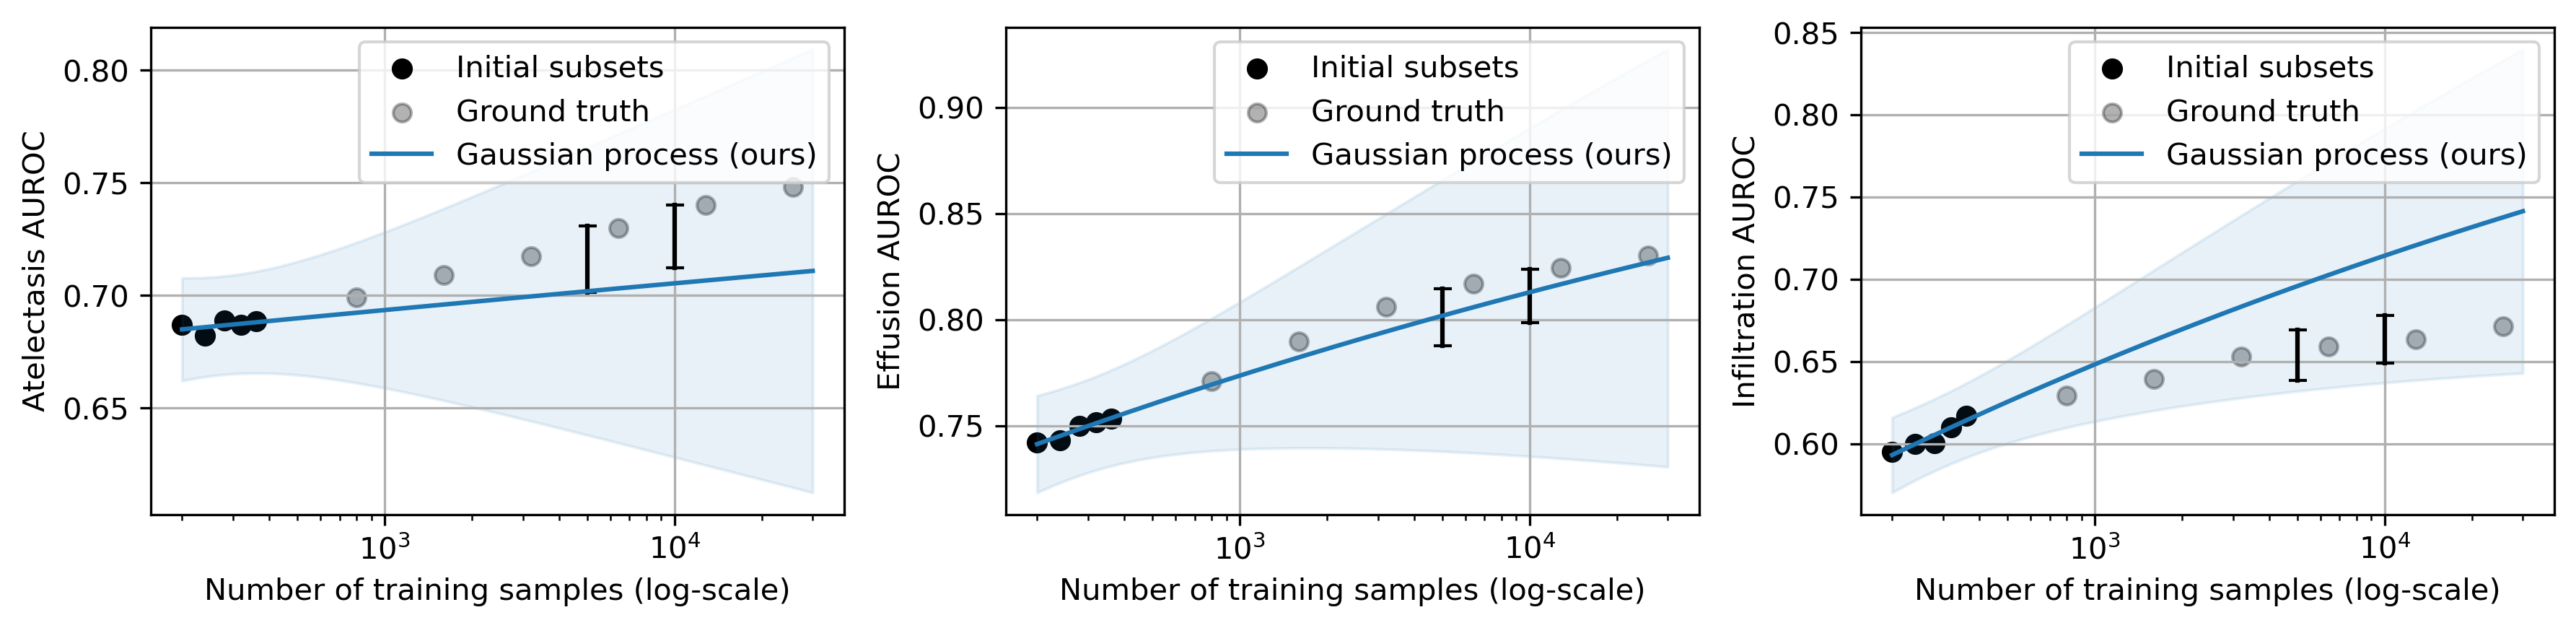

In [6]:
df = load_experiment('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/ChestX-ray14_long_range.csv')
df5k = load_experiment('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/ChestX-ray14_5k.csv')
df10k = load_experiment('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/ChestX-ray14_10k.csv')
plot_experiment(df, df5k, df10k, ['Atelectasis', 'Effusion', 'Infiltration'])

In [7]:
stacked_df = load_experiment('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/ChestX-ray14_5k.csv')
group_size = 3
stacked_df['group'] = (stacked_df.index // group_size) + 1
result = stacked_df.groupby('group').test_auroc.agg(lambda x: list(x)).reset_index()
print(result.shape)
result.head(100)

(100, 2)


,group,test_auroc
0,1,"[[0.72498104, 0.8043065, 0.66675027], [0.73930..."
1,2,"[[0.69892262, 0.78874746, 0.66134304], [0.7174..."
2,3,"[[0.72347279, 0.80504298, 0.65100617], [0.7203..."
3,4,"[[0.72843029, 0.80146744, 0.65957554], [0.7328..."
4,5,"[[0.72666336, 0.80465079, 0.65835794], [0.7150..."
...,...,...
95,96,"[[0.72535469, 0.80331921, 0.65910843], [0.7179..."
96,97,"[[0.74468999, 0.81421039, 0.65675692], [0.6849..."
97,98,"[[0.71630293, 0.81426342, 0.65817278], [0.7012..."
98,99,"[[0.70373733, 0.7979201, 0.6559086], [0.698476..."


[[0.72498104 0.8043065  0.66675027]
 [0.73930538 0.82301725 0.63594494]
 [0.71173437 0.80690445 0.66630576]]
[0.72534026 0.8114094  0.65633366]


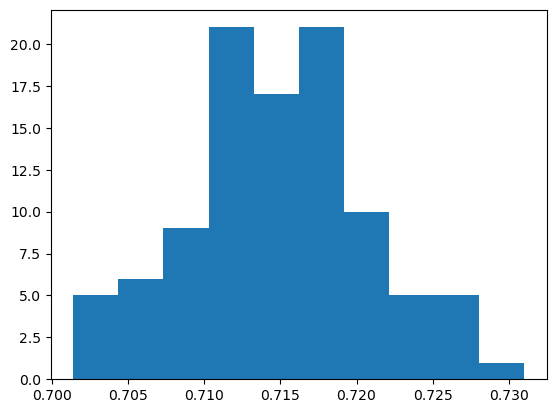

In [8]:
test_aurocs = np.array(result.test_auroc.tolist())
# _, label, group
print(test_aurocs[0])
mean_test_aurocs = np.mean(test_aurocs, axis=1)
print(mean_test_aurocs[0])
plt.hist(mean_test_aurocs[:,0])
plt.show()